<a href="https://colab.research.google.com/github/sumangupta87/House_Prices_Prediction_Kaggle/blob/main/House_Prices_Prediction_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## > **House Prices - Advanced Regression Techniques - Kaggle Competition(Knowledge)**
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques




In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
#Reading the data as a Pandas dataframe
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()
test.shape

(1459, 80)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Finding the duplicates(if any) and dropping them
train=train.drop_duplicates()

In [6]:
# Finding the percentage of missing values for all the columns separately
missing = train.isnull().sum() 

In [7]:
len(train.index)

1460

In [8]:
missing[missing>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
for i in missing[missing>0].index:
  print('training set {} unique values are {}'.format(i,train[i].unique()))
  print("testing set {} unique values are {}".format(i,test[i].unique()))

training set LotFrontage unique values are [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
testing set LotFrontage unique values are [ 80.  81.  74.  78.  43.  75.  nan  63.  85.  70.  26.  21.  24. 102.
  94.  90.  79. 110. 105.  41. 100.  67.  60.  73.  92.  84.  39.  88.
  25.  30.  57.  68.  98. 120.  87. 119.  65.  56.  69.  50.  53.  52.
  51.  72.  86. 124.  44.  83.  64.  82.  38.  89.  35.  58.  66.  93.
  31.  76.  28.  61.  95. 129.  59.  77.  96.  47.  34. 117.  48.  

In [10]:
train['Alley'].fillna("No alley",inplace = True)
test['Alley'].fillna("No alley",inplace = True)


train['BsmtQual'].fillna("No Basement",inplace = True)
test['BsmtQual'].fillna("No Basement",inplace = True)


train['BsmtCond'].fillna("No Basement",inplace = True)
test['BsmtCond'].fillna("No Basement",inplace = True)


for cat in ['BsmtExposure','BsmtFinType1','BsmtFinType2']:
  train[cat].fillna("No Basement",inplace = True)
  test[cat].fillna("No Basement",inplace = True)
 
for cat in ['GarageType','GarageFinish','GarageQual','GarageCond']:
  train[cat].fillna("No Garage",inplace = True)
  test[cat].fillna("No Garage",inplace = True)


train['FireplaceQu'].fillna("No Fireplace",inplace = True)
test['FireplaceQu'].fillna("No Fireplace",inplace = True)

train['PoolQC'].fillna("No Pool",inplace = True)
test['PoolQC'].fillna("No Pool",inplace = True)

train['Fence'].fillna("No Fence",inplace = True)
test['Fence'].fillna("No Fence",inplace = True)

train['MiscFeature'].fillna("None",inplace = True)
test['MiscFeature'].fillna("None",inplace = True)

In [11]:
test.shape

(1459, 80)

In [12]:
# Finding the percentage of missing values for all the columns separately
missing = train.isnull().sum()
missing[missing>0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [13]:
# Finding the percentage of missing values for all the columns separately
missing = test.isnull().sum()
missing[missing>0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64

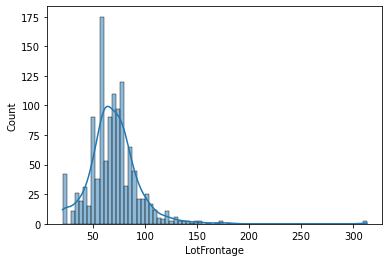

In [14]:
sns.histplot(train['LotFrontage'],kde = True)

In [15]:
train['LotFrontage'].skew()

2.163569142324884

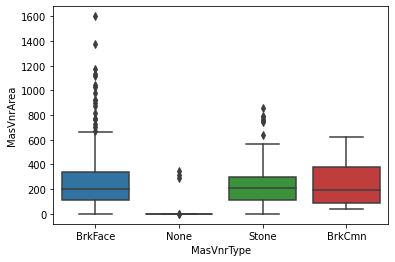

In [16]:
sns.boxplot(x='MasVnrType',y="MasVnrArea",data=train)

In [17]:
train[train['MasVnrType']!='None']['MasVnrArea'].mean()

254.43027210884352

In [18]:
test['MasVnrType'].mode()

0    None
dtype: object

In [19]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].mean(),inplace=True)

train['MasVnrType'].fillna(train['MasVnrType'].mode()[0],inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0],inplace=True)

train.loc[train['MasVnrType'] == 'None','MasVnrArea']  = 0
test.loc[test['MasVnrType'] == 'None','MasVnrArea']  = 0
train.loc[train['BsmtFinType1'] == 'No Basement','BsmtFinSF1']  = 0
train.loc[train['BsmtFinType2'] == 'No Basement','BsmtFinSF2']  = 0

train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0],inplace=True)
test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0],inplace=True)

train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

In [20]:
missing = train.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

In [21]:
testmissing = test.isnull().sum()
testmissing[testmissing>0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [22]:
test['MSZoning'].fillna(test['MSZoning'].mode()[0],inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0],inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0],inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0],inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0],inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0],inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0],inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0],inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0],inplace=True)

test.loc[test['BsmtQual'] == 'No Basement','BsmtCond']  = 'No Basement'
test.loc[test['BsmtQual'] == 'No Basement','BsmtExposure']  = 'No Basement'
test.loc[test['BsmtQual'] == 'No Basement','BsmtFinType1']  = 'No Basement'
test.loc[test['BsmtQual'] == 'No Basement','BsmtFinType2']  = 'No Basement'
test.loc[test['PoolQC'] == 'No Pool','PoolArea']  = 0

test.loc[test['BsmtFinType1'] == 'No Basement','BsmtFinSF1']  = 0
test.loc[test['BsmtFinType2'] == 'No Basement','BsmtFinSF2']  = 0
test.loc[test['BsmtQual'] == 'No Basement','BsmtUnfSF']  = 0
test.loc[test['BsmtQual'] == 'No Basement','TotalBsmtSF']  = 0


test.loc[test['GarageQual'] == 'No Garage','GarageCars']  = 0
test.loc[test['GarageQual'] == 'No Garage','GarageArea']  = 0

In [23]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [24]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,102.469178,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.533794,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,162.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
train.drop('Id',axis = 1,inplace = True)
test.drop('Id',axis = 1,inplace = True)

In [26]:
train_copy = train.copy()
test_copy = test.copy()
X1 = train.copy()
X2 = train.copy()
y1=X1.pop('SalePrice')
y2=X2.pop('SalePrice')
y1=y1.values
y2=y2.values
print(X1.shape)
print(X2.shape)
print(y1.shape)
print(y2.shape)
print(test.shape)

(1460, 79)
(1460, 79)
(1460,)
(1460,)
(1459, 79)


In [27]:
X1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [28]:
discrete_features = ['MSSubClass', 'MSZoning','Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 
       'Functional', 'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

continous_features = ['LotFrontage','LotArea','YearBuilt', 'YearRemodAdd',  'MasVnrArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                     'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                     'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea','MiscVal','MoSold', 'YrSold']

In [29]:
X1[discrete_features].dtypes

MSSubClass        int64
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC          

In [30]:
X1[continous_features].dtypes

LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [31]:
# Encoding Categorical Variable with Label Encoding
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
for i in discrete_features:
  train_copy.loc[:,i] = labelEncoder.fit_transform(train_copy.loc[:,i])
  test_copy.loc[:,i] = labelEncoder.fit_transform(test_copy.loc[:,i])



In [32]:
X = train_copy.copy()
y=X.pop('SalePrice')

dis_fea = X.dtypes == 'int64'

In [33]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,8,4
1,0,3,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,8,4
2,5,3,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,8,4
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,8,0
4,5,3,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,8,4


In [34]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [35]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

79

In [36]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [37]:
X['BsmtHalfBath'].var()

0.05700282610532642

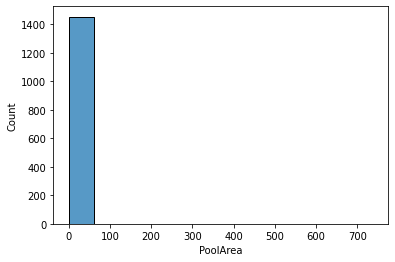

In [38]:
sns.histplot(X['PoolArea'])

In [39]:
X['PoolArea'].value_counts(normalize = True)

0      0.995205
512    0.000685
648    0.000685
576    0.000685
555    0.000685
480    0.000685
519    0.000685
738    0.000685
Name: PoolArea, dtype: float64

## Remove quasi-constant features 
- "Street"
- 'Alley'
- 'Utilities'
- 'Condition2'
- 'RoofMatl'
- 'Heating'
- 'LowQualFinSF'
- '3SsnPorch'
- 'PoolArea'
- 'PoolQC'

In [40]:
# using sklearn variancethreshold to find constant features

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)
sel.fit(X)  # fit finds the features with zero variance

VarianceThreshold(threshold=0.1)

In [41]:
sum(sel.get_support())

69

In [42]:
print(
    len([
        x for x in X.columns
        if x not in X.columns[sel.get_support()]
    ]))

[x for x in X.columns if x not in X.columns[sel.get_support()]]

10


['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'Heating',
 'CentralAir',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'PoolQC']

### **Mutual** **Information**

In [43]:
from sklearn.feature_selection import mutual_info_regression
# mutual_info_classif for discreate output variable

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, dis_fea)
mi_scores[:] 


OverallQual     5.728012e-01
Neighborhood    5.283454e-01
GarageArea      4.925076e-01
GrLivArea       4.323174e-01
YearBuilt       4.079052e-01
                    ...     
Utilities       1.887379e-15
PoolArea        2.220446e-16
PoolQC          0.000000e+00
MoSold          0.000000e+00
YrSold          0.000000e+00
Name: MI Scores, Length: 79, dtype: float64

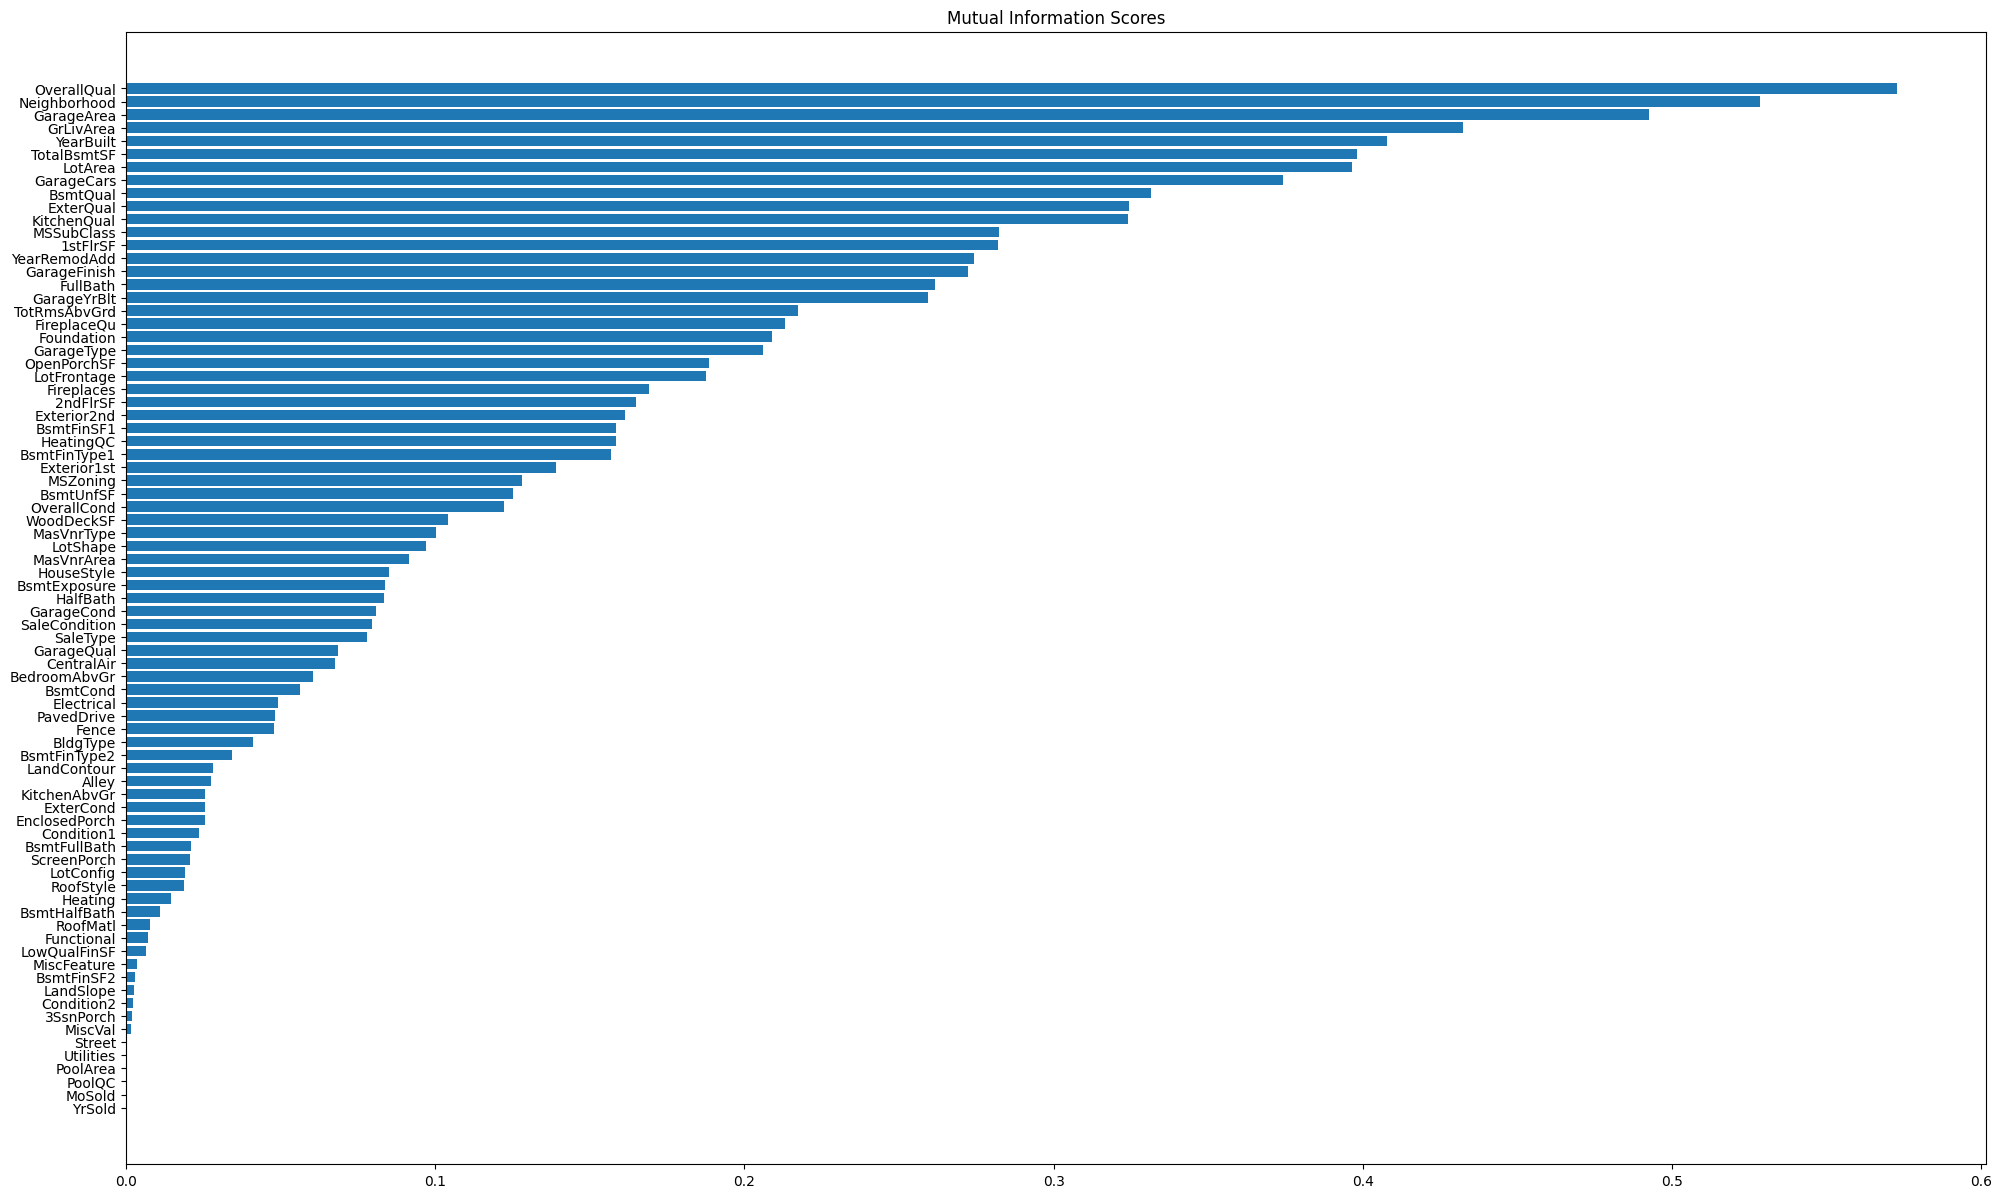

In [44]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(24, 15))
plot_mi_scores(mi_scores)

In [45]:
final_feature_MF = mi_scores[:26] 
print(final_feature_MF)

OverallQual     0.572801
Neighborhood    0.528345
GarageArea      0.492508
GrLivArea       0.432317
YearBuilt       0.407905
TotalBsmtSF     0.398015
LotArea         0.396509
GarageCars      0.374166
BsmtQual        0.331329
ExterQual       0.324456
KitchenQual     0.324065
MSSubClass      0.282419
1stFlrSF        0.281870
YearRemodAdd    0.274371
GarageFinish    0.272303
FullBath        0.261769
GarageYrBlt     0.259246
TotRmsAbvGrd    0.217412
FireplaceQu     0.213035
Foundation      0.208895
GarageType      0.206165
OpenPorchSF     0.188608
LotFrontage     0.187732
Fireplaces      0.169080
2ndFlrSF        0.165064
Exterior2nd     0.161310
Name: MI Scores, dtype: float64


**RANDOM FORREST REGRESSOR FEATURE SELECTION**

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
baseline_rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
baseline_rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 test Score: {:.2f}'.format(baseline_rf.score(X_train, y_train), 
                                                                                  baseline_rf.oob_score_,
                                                                                  baseline_rf.score(X_test, y_test)))

R^2 Training Score: 0.98 
OOB Score: 0.85 
R^2 test Score: 0.84


In [47]:
features = baseline_rf.feature_names_in_
importances = baseline_rf.feature_importances_
indices = np.argsort(importances)
final_feature_RF = features[indices][-1:-26:-1]
final_feature_RF

array(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1',
       'GarageCars', '1stFlrSF', 'GarageArea', 'MasVnrArea', 'LotArea',
       '2ndFlrSF', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'Neighborhood', 'MoSold', 'TotRmsAbvGrd', 'LotFrontage',
       'FullBath', 'OpenPorchSF', 'GarageType', 'OverallCond', 'BsmtQual',
       'Fireplaces', 'WoodDeckSF', 'GarageYrBlt'], dtype=object)

In [48]:
for name, importance in zip(baseline_rf.feature_names_in_, baseline_rf.feature_importances_):
    print(name, '=',importance)

MSSubClass = 0.0013996374747174258
MSZoning = 0.0021190359146638776
LotFrontage = 0.005571681586136936
LotArea = 0.012425974453698804
Street = 9.613662430831125e-06
Alley = 9.730804414120021e-05
LotShape = 0.0029642414632538553
LandContour = 0.0009730211133774833
Utilities = 4.633212575694562e-09
LotConfig = 0.0006930047727696457
LandSlope = 0.0009616811523594962
Neighborhood = 0.0073823272898673195
Condition1 = 0.00032916428314112844
Condition2 = 0.0004924828205696467
BldgType = 0.0002658792875022243
HouseStyle = 0.000674367567982137
OverallQual = 0.568840910476307
OverallCond = 0.0049953135293454515
YearBuilt = 0.01001833369964635
YearRemodAdd = 0.007636451421457914
RoofStyle = 0.0009060329159710379
RoofMatl = 0.0006967255915343642
Exterior1st = 0.0017177524274309811
Exterior2nd = 0.0011215186650116488
MasVnrType = 0.0007485698679925731
MasVnrArea = 0.013672038519092995
ExterQual = 0.0022689115913837273
ExterCond = 0.0004437761408834336
Foundation = 0.0004931139710413767
BsmtQual = 0

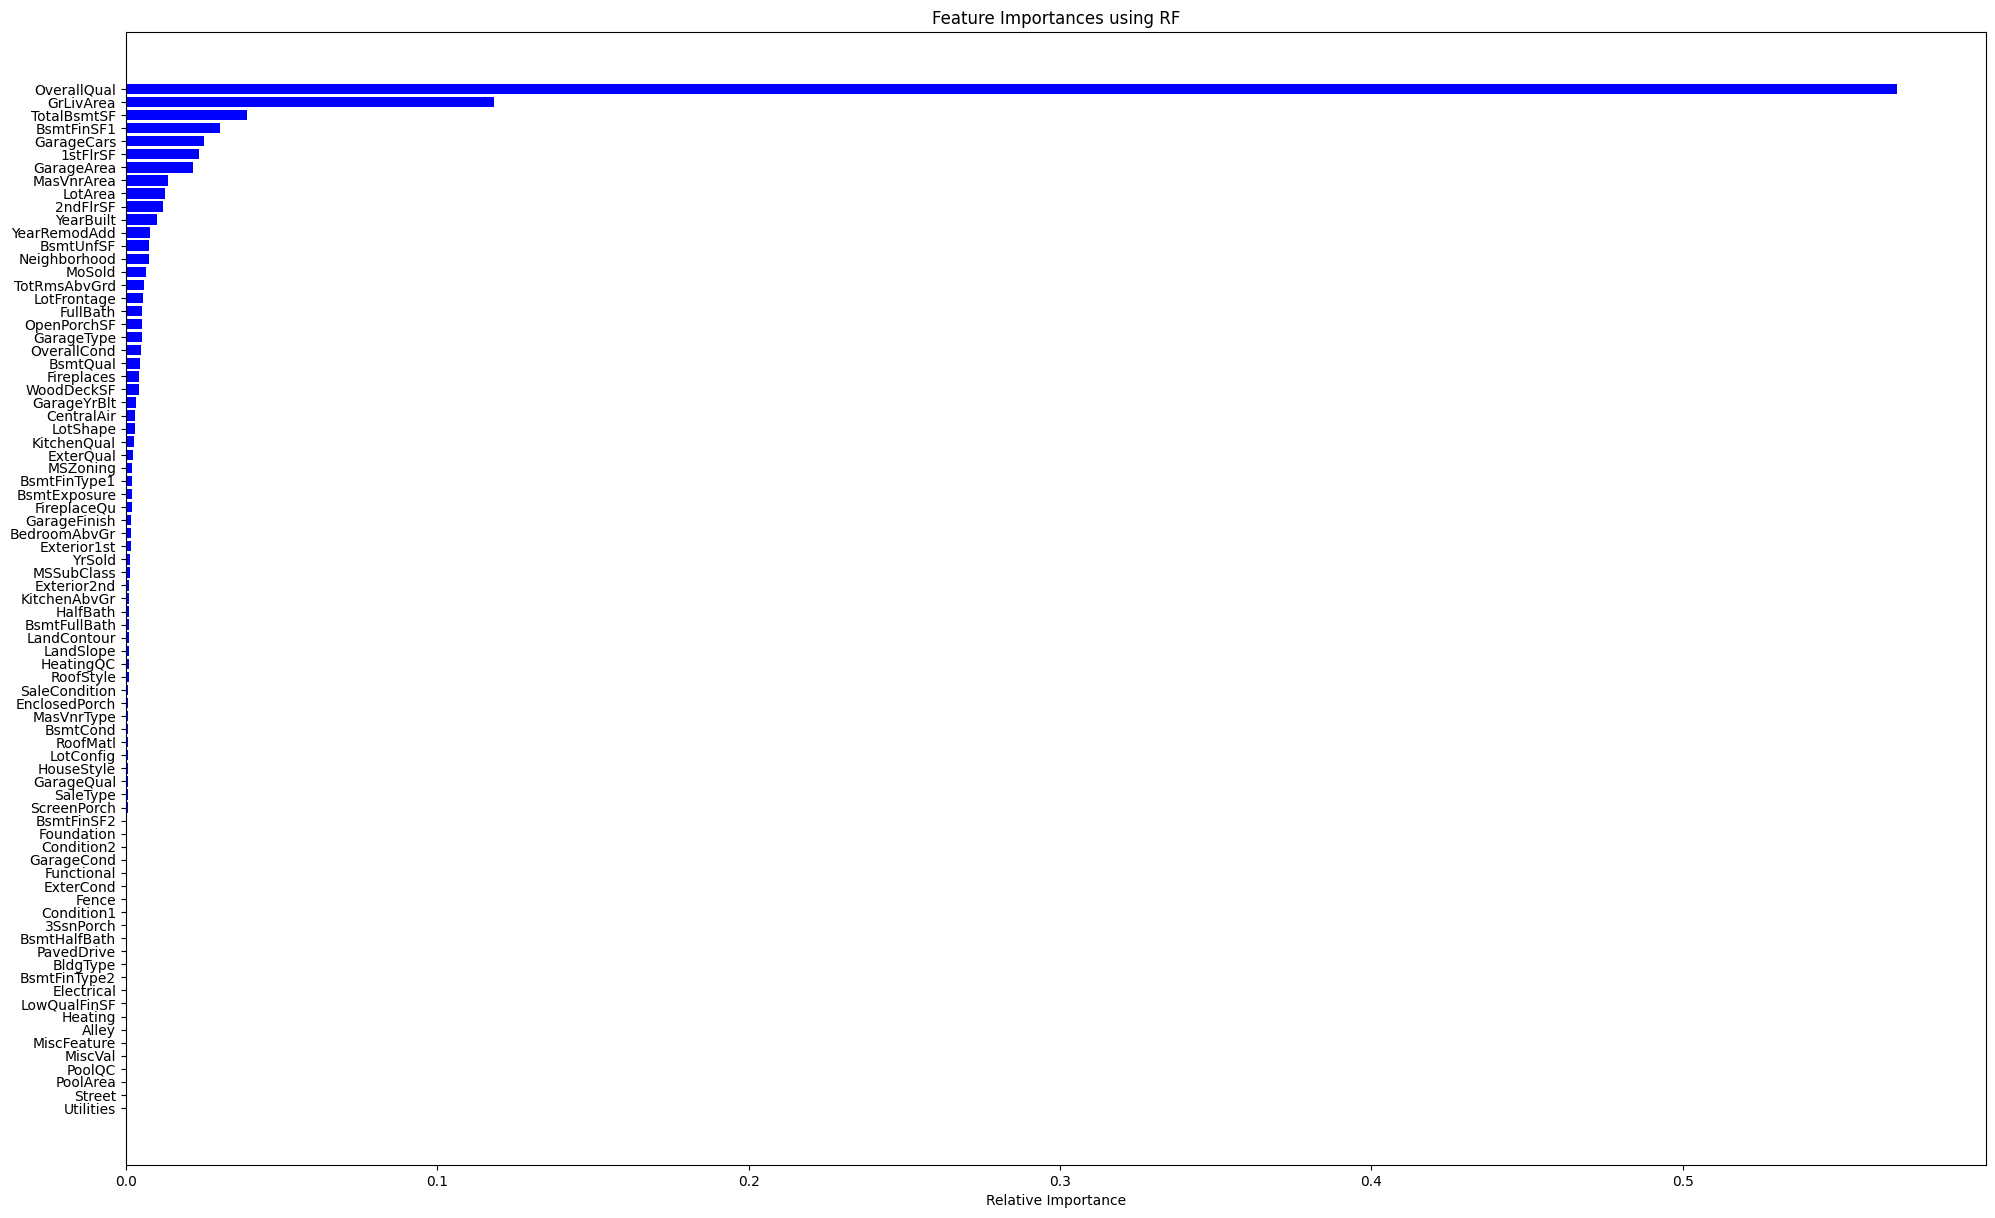

In [49]:
features = baseline_rf.feature_names_in_
importances = baseline_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(dpi=100, figsize=(24, 15))
plt.title('Feature Importances using RF')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### RECURSIV FEATURE SELECTION

In [50]:
from sklearn.feature_selection import RFE

# Init the transformer
rfe = RFE(estimator=baseline_rf, n_features_to_select = 25, step = 5)
# Fit to the training data
_ = rfe.fit(X_train, y_train)

print(X_train.columns[rfe.support_])
final_feature_RFE= X_train.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold'],
      dtype='object')


### RFE CV Feature Selection

In [51]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Init, fit
rfecv = RFECV(
    estimator=baseline_rf,
    min_features_to_select=10,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

_ = rfecv.fit(X_train, y_train)

In [52]:
len(X_train.columns[rfecv.support_])
final_feature_RFECV = X_train.columns[rfecv.support_]

## ANOVA

#### Street, Utilities, CentralAir are having only two level

In [53]:
train[discrete_features].nunique()

MSSubClass       15
MSZoning          5
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            4
Fence             5
MiscFeature       5
SaleType          9
SaleCondition     6
dtype: int64

In [54]:
discrete_features_anova = ['MSSubClass', 'MSZoning', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC','Electrical', 'KitchenQual', 
       'Functional', 'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

discrete_features_ttest = ['Street', 'Utilities', 'CentralAir']

train[discrete_features_anova].head()


,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,No alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,20,RL,No alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,60,RL,No alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,70,RL,No alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,60,RL,No alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [55]:
# Manual Calculation
total_observation = train['SalePrice'].count()
k = len(train['MSZoning'].unique()) # No of groups
n = train['MSZoning'].value_counts().to_dict() # number of items in each group

# H₀ (Null hypothesis) — that there is no difference among group means.

In [56]:
# STEP 1 : Calculate group mean and overall mean
group_mean = train.groupby('MSZoning')['SalePrice'].mean()
Total_mean = train['SalePrice'].mean()
print(group_mean, Total_mean)

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64 180921.19589041095


In [57]:
# STEP2 : Calculate the Sum of Squares
# Sum of squares of all observation — SS_total
# Sum of squares within — SS_within
# Sum of squares between — SS_between

SS_total = ((train['SalePrice'] - Total_mean)**2).sum()
SS_within = 0
for label in train['MSZoning'].unique():
  SS_within += ((train[train['MSZoning'] == label]['SalePrice'] - group_mean[label])**2).sum()

SS_between = 0
for item in group_mean.index:
  SS_between += n[item]*(group_mean[item] - Total_mean)**2


In [58]:
SS_between + SS_within - SS_total

-0.001953125

In [59]:
# STEP3: Creating ANOVA Table
degree_f_total = total_observation - 1
degree_f_within = total_observation - k #df2
degree_f_between = k - 1 #df1

print("df1 : {}, df2 : {}".format(degree_f_between,degree_f_within))

df1 : 4, df2 : 1455


In [60]:
# STEP4 : Calculate mean squared values
mean_sq_between = SS_between/degree_f_between
mean_sq_within = SS_within/degree_f_within

In [61]:
# STEP5 : Calculate F-value
F = mean_sq_between/mean_sq_within
print(F)
print("F_critical: {}".format(2.38))

43.84028167245722
F_critical: 2.38


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


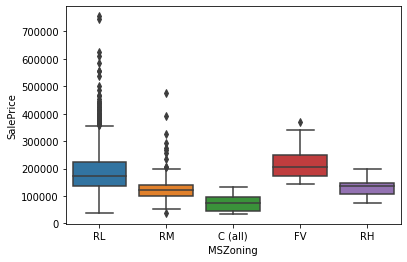

In [62]:
# So we can reject NULL Hypothesis => 'MSZoning' has impact on output

sns.boxplot(train['MSZoning'], train['SalePrice'])

In [63]:
# Using scipy library
from scipy.stats import f_oneway

# H₀ (Null hypothesis) — that there is no difference among group means.

In [64]:
feature = {}
for item in discrete_features_anova:
  store = {}
  for label in train[item].unique():
    store[label] = train[train[item] == label]['SalePrice']
  feature[item] = store

In [65]:
feature.keys()

dict_keys(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'])

In [66]:
anova_stat = {}
for feat in feature.keys():
  f_val, p_val = f_oneway(*[list(feature[feat][name]) for name in feature[feat].keys()])
  anova_stat[feat] = {"F-value":round(f_val,4), "P-value": round(p_val,4)}



In [67]:
anova_dataFrame = pd.DataFrame.from_dict(anova_stat, orient = 'index')


In [68]:
anova_dataFrame.sort_values("F-value", ascending = False)

,F-value,P-value
ExterQual,443.3348,0.0000
KitchenQual,407.8064,0.0000
OverallQual,349.0268,0.0000
BsmtQual,316.1486,0.0000
GarageFinish,213.8670,0.0000
FireplaceQu,121.0751,0.0000
MasVnrType,108.9113,0.0000
Foundation,100.2539,0.0000
HeatingQC,88.3945,0.0000
GarageType,80.3800,0.0000


## "LandSlope" has no impact on "Sales Price"

> Indented block



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


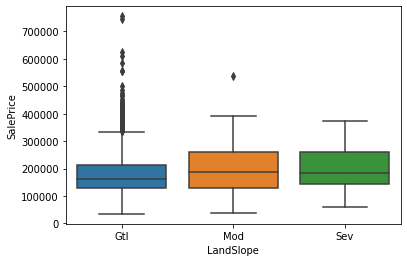

In [69]:
sns.boxplot(train['LandSlope'], train['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


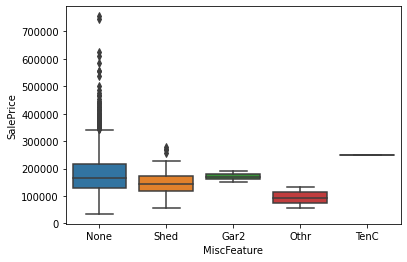

In [70]:
sns.boxplot(train['MiscFeature'], train['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


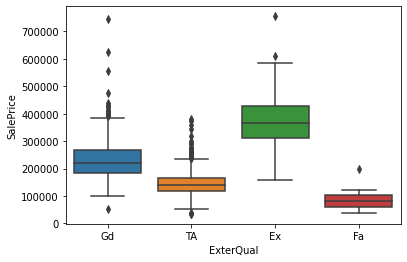

In [71]:
sns.boxplot(train['ExterQual'], train['SalePrice'])

In [72]:
# It takes only encoded value
from sklearn.feature_selection import f_regression, SelectKBest
kbestFeature = SelectKBest(f_regression, k = 13)
X_new = kbestFeature.fit_transform(X[discrete_features_anova], y)
X_new.shape

(1460, 13)

In [73]:
final_feature_Anove_Cat = kbestFeature.get_feature_names_out(discrete_features_anova)

In [74]:
np.array(discrete_features_anova)[kbestFeature.get_support()]

array(['LotShape', 'OverallQual', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive'],
      dtype='<U13')

In [75]:
final_feature_Anove_Cat

array(['LotShape', 'OverallQual', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'Electrical', 'KitchenQual',
       'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


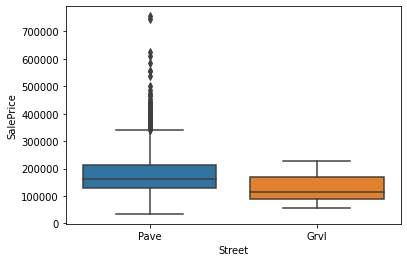

In [76]:
sns.boxplot(train['Street'], train['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


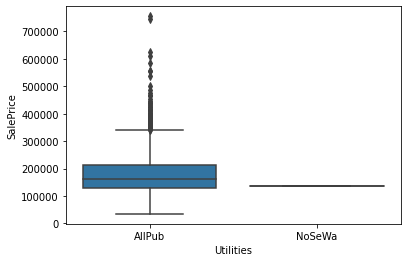

In [77]:
sns.boxplot(train['Utilities'], train['SalePrice'])

In [78]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

**"Utilities" has no impact on Sales Price**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


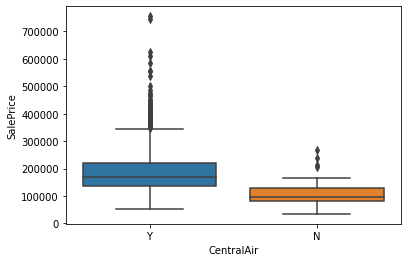

In [79]:
sns.boxplot(train['CentralAir'], train['SalePrice'])

# For two group variable use t-test. If the sample size is < 30 then t-test is must.
# Z-test require population variance. If sample size is high we can assume sample variance is equal to population variance and calculate Z-score.
# Howver if sample size is high z-score and t-score becomes very close.
# So it is better to use t-score.

# *t-test*


In [80]:
# Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. 
# As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance 
# to the smaller sample variance is less than 4:1. 
train['Street'].unique()
np.var(train[train['Street'] == 'Pave']['SalePrice'])/np.var(train[train['Street'] == 'Grvl']['SalePrice'])

1.7671095308973526

In [81]:
# So we can assume two population has equal variance as the ratio is less than 4
# However we will use equal_var = False as the sample size is also different. If sample size and variance both equal then we use equal_variance = True(default)

In [82]:
# Using SciPi library
# H0:  There is no significan difference between mean of Two category
# HA: There is significan difference between mean of Two category

from scipy.stats import ttest_ind
rvs1 = train[train['Street'] == 'Pave']['SalePrice']
rvs2 = train[train['Street'] == 'Grvl']['SalePrice']

t,p = ttest_ind(rvs1, rvs2, equal_var=False)
print("t-scrore: %s, p-value: %s"%(t,p))

t-scrore: 1.9007878559110067, p-value: 0.11504797250476277


In [83]:
# Manual Calculation
# H0:  There is no significan difference between mean of Two category
# HA: There is significan difference between mean of Two category

Pave_mean=train.loc[train['Street']=='Pave','SalePrice'].mean()
Grvl_mean=train.loc[train['Street']=='Grvl','SalePrice'].mean()
Pave_std=train.loc[train['Street']=='Pave','SalePrice'].std()
Grvl_std=train.loc[train['Street']=='Grvl','SalePrice'].std()
no_of_Pave=train.loc[train['Street']=='Pave','SalePrice'].count()
no_of_Grvl=train.loc[train['Street']=='Grvl','SalePrice'].count()

In [84]:
# Use the formulas directly
# https://en.wikipedia.org/wiki/Welch%27s_t-test
from scipy.special import stdtr  #Calculating p by integrating from -inf to t valwith dof > 0
adof = no_of_Pave - 1
bdof = no_of_Grvl - 1
tf = (Pave_mean - Grvl_mean) / np.sqrt(Pave_std**2/no_of_Pave + Grvl_std**2/no_of_Grvl)
dof = (Pave_std**2/no_of_Pave + Grvl_std**2/no_of_Grvl)**2 / (Pave_std**4/(no_of_Pave**2*adof) + Grvl_std**4/(no_of_Grvl**2*bdof))
pf = 2*stdtr(dof, -np.abs(tf))

print("formula:              t = %g  p = %g" % (tf, pf))

formula:              t = 1.90079  p = 0.115048


## "Street" can be dropped from feature list. It has not much impact on Output.

### Z-Test

In [85]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(rvs1, rvs2, value=0) 

(1.5682122172618094, 0.11683161412083638)

In [86]:
# Using SciPi library
# H0:  There is no significan difference between mean of Two category
# HA: There is significan difference between mean of Two category

from scipy.stats import ttest_ind
rvs1 = train[train['CentralAir'] == 'Y']['SalePrice']
rvs2 = train[train['CentralAir'] == 'N']['SalePrice']

t,p = ttest_ind(rvs1, rvs2, equal_var=False)
print("t-scrore: {r:1.6f}, p-value: {x:1.6f}".format(r=t,x=p))

t-scrore: 17.267773, p-value: 0.000000


### P-value < 0.05 => Reject NULL Hypothesis
### "CentralAir" has significant impact on Output.

## Check Multi-Colinearity b/w Categorical Variable

In [87]:
relevant_discrete_features = ['MSSubClass', 'MSZoning', 'Alley',
       'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC','Electrical', 'KitchenQual', 
       'Functional', 'FireplaceQu', 'GarageType', 
       'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','CentralAir']

In [88]:
# Null Hypothesis (H0): There is no relationship between the variables
# Alternative Hypothesis (H1): There is a relationship between variables

# Import the function
from scipy.stats import chi2_contingency
#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(train['MSSubClass'], train['LandContour']))
print('Chi2 Statistic: {r:1.8f}, p-value: {s:1.8f}'.format(r=chi_res[0], s=chi_res[1]))


Chi2 Statistic: 128.30767208, p-value: 0.00000000


In [89]:
chi2_check = {}
col = []
noncol = []
for i in relevant_discrete_features:
  for j in relevant_discrete_features:
    if chi2_contingency(pd.crosstab(train[i], train[j]))[1] < 0.05:
      col.append(i+"-"+j)       
    else:
       noncol.append(i+"-"+j)

chi2_check['Co-Linear Feature(Reject H0)'] = col
chi2_check['Non-Co-Linear Feature(Fail to Reject H0)'] = noncol

In [90]:
#chi2_check = []
#for i in relevant_discrete_features:
#    if chi2_contingency(pd.crosstab(train['MSSubClass'], train[i]))[1] < 0.05:
#       chi2_check.append('Co-Linear Feature(Reject H0)')
#    else:
#       chi2_check.append('Non-Co-Linear Feature(Fail to Reject H0)')
#res = pd.DataFrame(data = [relevant_discrete_features, chi2_check]).T
#res.columns = ['Column', 'Hypothesis']
#print(res)

In [91]:
chi2_check

{'Co-Linear Feature(Reject H0)': ['MSSubClass-MSSubClass',
  'MSSubClass-MSZoning',
  'MSSubClass-Alley',
  'MSSubClass-LotShape',
  'MSSubClass-LandContour',
  'MSSubClass-LotConfig',
  'MSSubClass-Neighborhood',
  'MSSubClass-Condition1',
  'MSSubClass-Condition2',
  'MSSubClass-BldgType',
  'MSSubClass-HouseStyle',
  'MSSubClass-OverallQual',
  'MSSubClass-OverallCond',
  'MSSubClass-RoofStyle',
  'MSSubClass-RoofMatl',
  'MSSubClass-Exterior1st',
  'MSSubClass-Exterior2nd',
  'MSSubClass-MasVnrType',
  'MSSubClass-ExterQual',
  'MSSubClass-ExterCond',
  'MSSubClass-Foundation',
  'MSSubClass-BsmtQual',
  'MSSubClass-BsmtCond',
  'MSSubClass-BsmtExposure',
  'MSSubClass-BsmtFinType1',
  'MSSubClass-BsmtFinType2',
  'MSSubClass-Heating',
  'MSSubClass-HeatingQC',
  'MSSubClass-Electrical',
  'MSSubClass-KitchenQual',
  'MSSubClass-Functional',
  'MSSubClass-FireplaceQu',
  'MSSubClass-GarageType',
  'MSSubClass-GarageFinish',
  'MSSubClass-GarageQual',
  'MSSubClass-GarageCond',
  'M

In [92]:
res = pd.DataFrame.from_dict(chi2_check['Co-Linear Feature(Reject H0)'])
print(res)
#res.to_csv("res.csv")

                             0
0        MSSubClass-MSSubClass
1          MSSubClass-MSZoning
2             MSSubClass-Alley
3          MSSubClass-LotShape
4       MSSubClass-LandContour
...                        ...
1472     CentralAir-GarageCond
1473     CentralAir-PavedDrive
1474       CentralAir-SaleType
1475  CentralAir-SaleCondition
1476     CentralAir-CentralAir

[1477 rows x 1 columns]


In [93]:
res1 = pd.DataFrame.from_dict(chi2_check['Non-Co-Linear Feature(Fail to Reject H0)'])
print(res1)
#res1.to_csv('res1.csv')

                          0
0         MSZoning-RoofMatl
1     MSZoning-BsmtFinType2
2       MSZoning-Functional
3           MSZoning-PoolQC
4            MSZoning-Fence
..                      ...
367    CentralAir-RoofStyle
368     CentralAir-RoofMatl
369       CentralAir-PoolQC
370        CentralAir-Fence
371  CentralAir-MiscFeature

[372 rows x 1 columns]


In [94]:
pd.crosstab(train['MSSubClass'], train['MSZoning'])

MSZoning,C (all),FV,RH,RL,RM
MSSubClass,,,,,
20,2,13,3,508,10
30,2,0,1,33,33
40,0,0,0,2,2
45,0,0,1,4,7
50,4,0,1,88,51
60,0,25,0,273,1
70,1,0,3,30,26
75,0,0,0,6,10
80,0,0,0,58,0


In [95]:
continous_features_corr = ['LotFrontage','LotArea','YearBuilt', 'YearRemodAdd',  'MasVnrArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                     'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                     'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea','MiscVal','MoSold', 'YrSold','SalePrice']

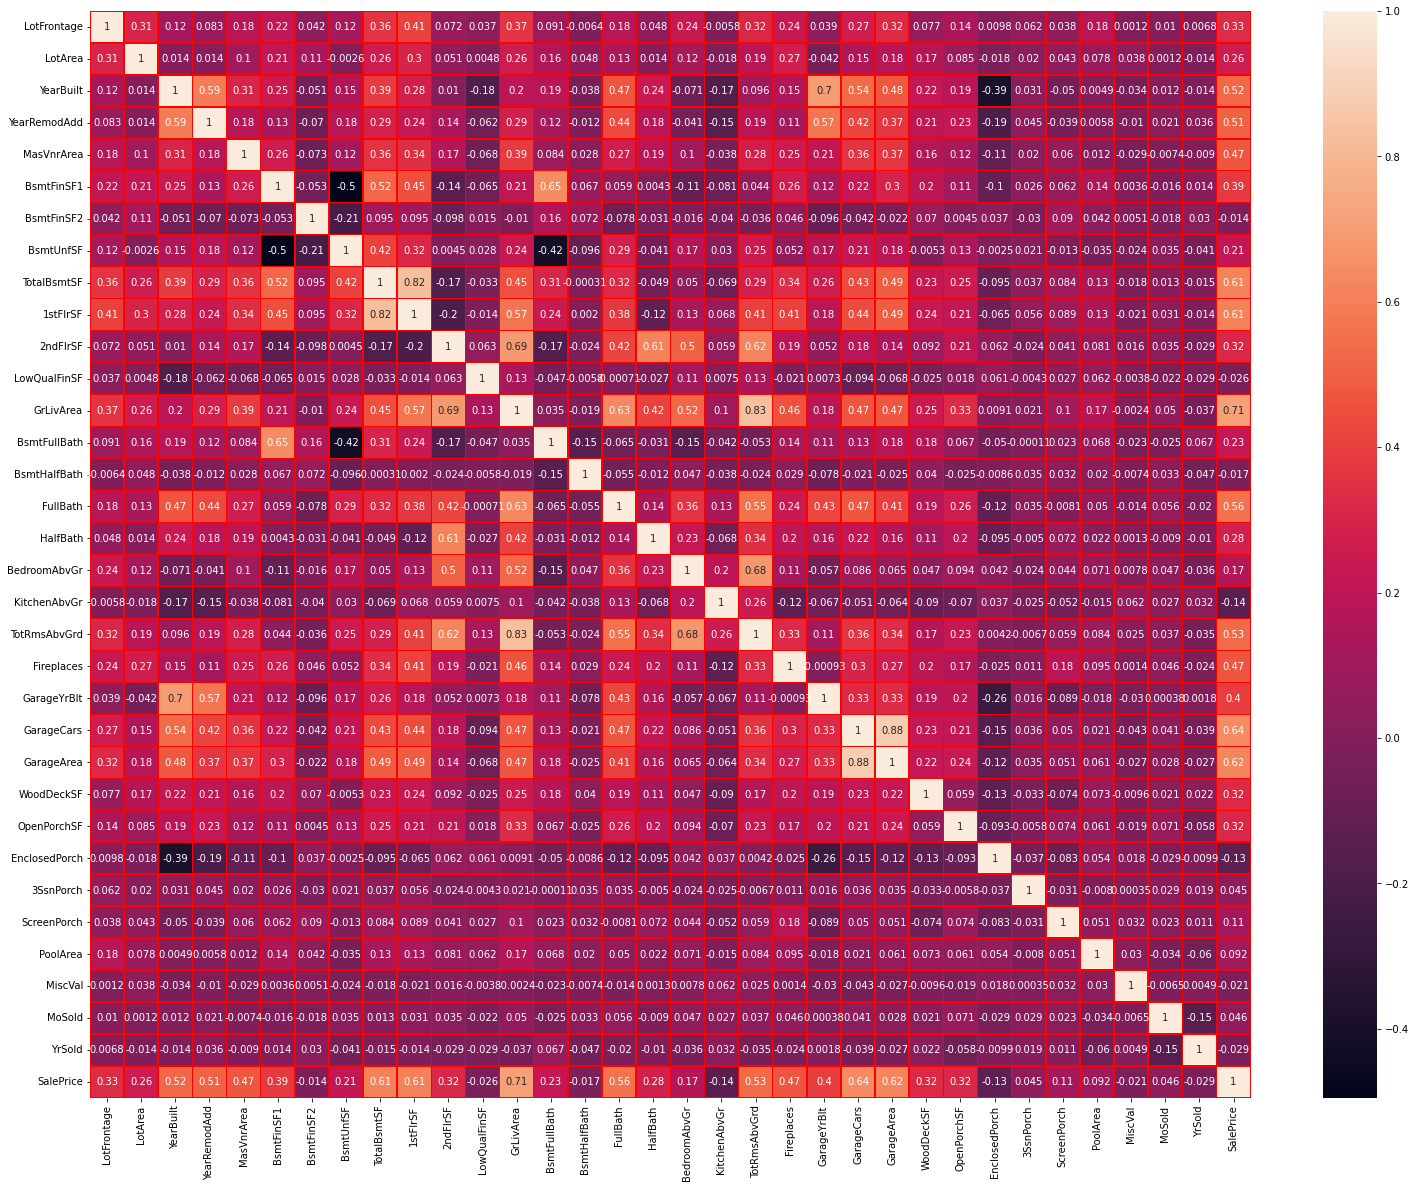

In [96]:
plt.figure(figsize = (26, 20))
sns.heatmap(train[continous_features_corr].corr(), annot = True,linewidths=0.5,linecolor='r')

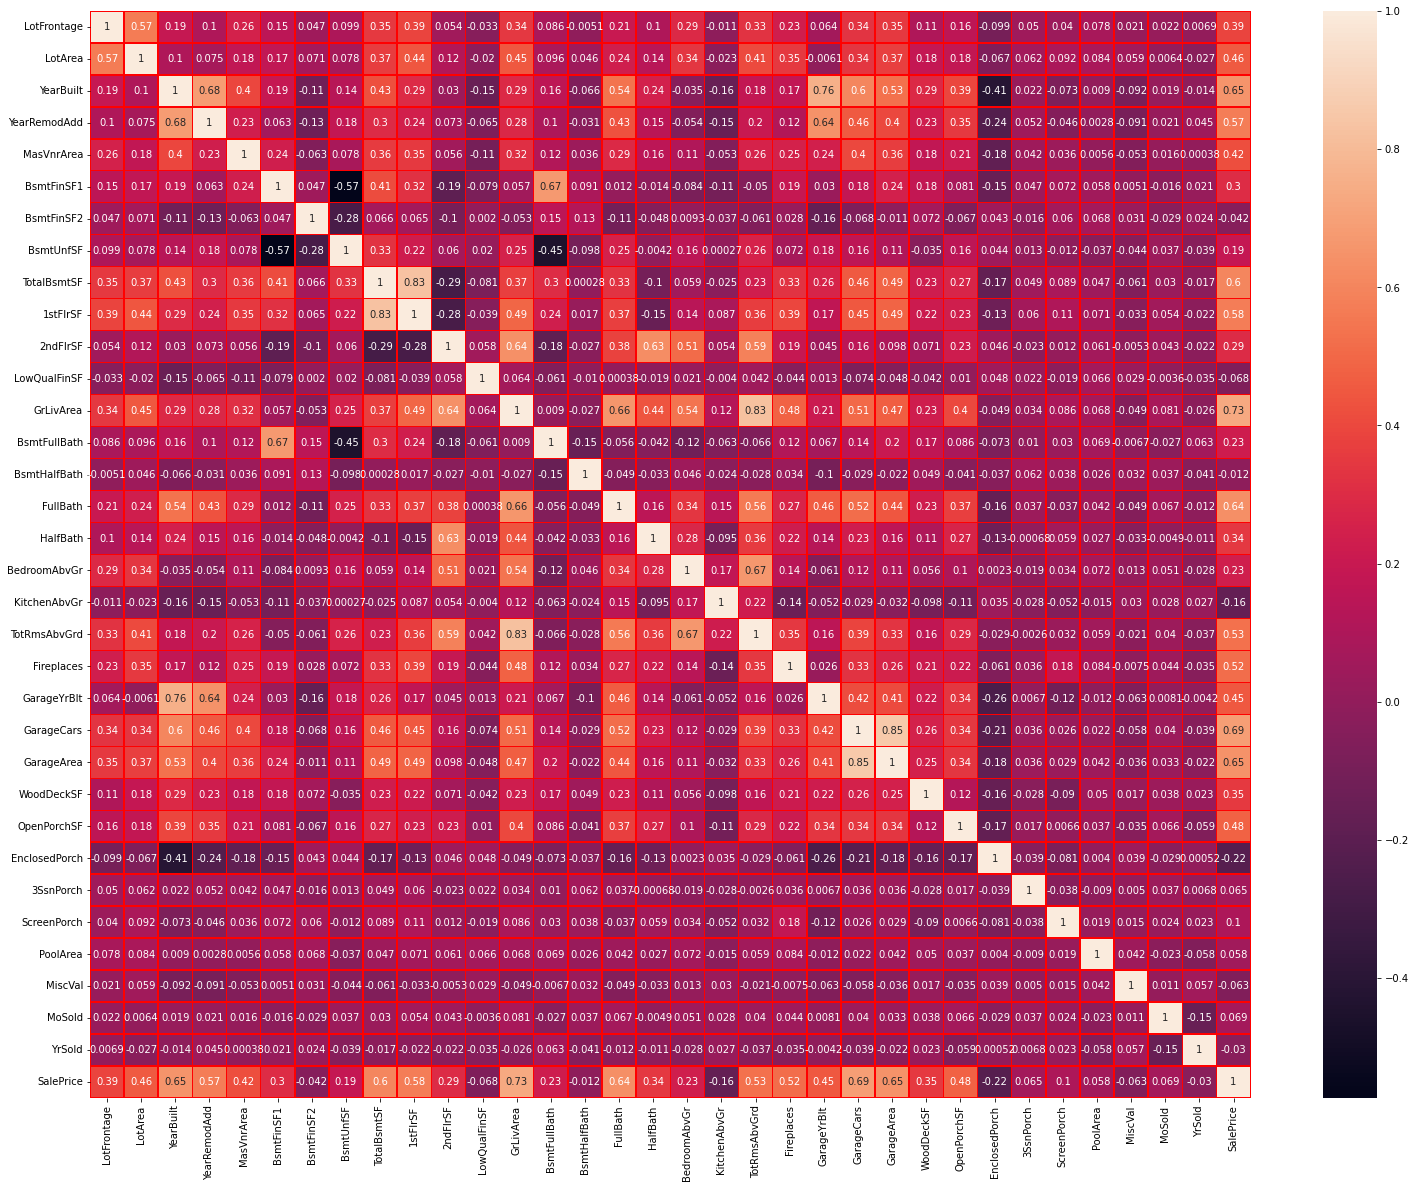

In [128]:
plt.figure(figsize = (26, 20))
sns.heatmap(train[continous_features_corr].corr(method = 'spearman'), annot = True,linewidths=0.5,linecolor='r')

## From the correlation table it is understood output variable "SalePrice" has high linear correlation with,
- GrLivArea


Also it has observed following features are highly correlated among each other,
- (TotalBsmtSF, 1stFlrSF)*
- (TotRmsAbvGrd, GrLivArea)*
- (GarageCars, GarageArea)*

### VIF



In [97]:
#Function to Calculate the VIFs for the newly created model
# Import library for VIF2
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF_get(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [98]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [99]:
VIF_get(train[continous_features])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
9,1stFlrSF,inf
10,2ndFlrSF,inf
12,GrLivArea,inf
11,LowQualFinSF,inf
32,YrSold,20804.74
3,YearRemodAdd,17813.17
2,YearBuilt,16750.05
21,GarageYrBlt,15701.51
8,TotalBsmtSF,8575.11
7,BsmtUnfSF,3443.64


In [100]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [101]:
VIF_get(train[cont_feat_vif])

,Features,VIF
31,YrSold,20804.74
3,YearRemodAdd,17813.17
2,YearBuilt,16750.05
20,GarageYrBlt,15701.51
8,TotalBsmtSF,8575.11
7,BsmtUnfSF,3443.64
5,BsmtFinSF1,2696.29
6,BsmtFinSF2,187.49
11,GrLivArea,104.91
18,TotRmsAbvGrd,82.12


In [102]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [103]:
VIF_get(train[cont_feat_vif])

,Features,VIF
30,YrSold,20799.45
3,YearRemodAdd,17811.05
2,YearBuilt,16722.32
19,GarageYrBlt,15700.20
10,GrLivArea,103.36
17,TotRmsAbvGrd,82.11
20,GarageCars,36.98
7,TotalBsmtSF,33.54
16,KitchenAbvGr,31.43
21,GarageArea,31.20


In [104]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

In [105]:
VIF_get(train[cont_feat_vif])

,Features,VIF
2,YearBuilt,15030.97
19,GarageYrBlt,14872.19
3,YearRemodAdd,12158.30
10,GrLivArea,102.69
17,TotRmsAbvGrd,82.06
20,GarageCars,36.54
7,TotalBsmtSF,33.38
21,GarageArea,31.18
16,KitchenAbvGr,29.76
15,BedroomAbvGr,28.72


In [106]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

In [107]:
VIF_get(train[cont_feat_vif])

,Features,VIF
2,YearBuilt,9808.71
3,YearRemodAdd,9679.40
10,GrLivArea,102.68
17,TotRmsAbvGrd,81.97
19,GarageCars,34.86
7,TotalBsmtSF,33.35
20,GarageArea,30.67
16,KitchenAbvGr,29.32
15,BedroomAbvGr,28.69
13,FullBath,20.77


In [108]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
9,GrLivArea,100.24
16,TotRmsAbvGrd,81.58
2,YearRemodAdd,51.67
18,GarageCars,34.66
6,TotalBsmtSF,32.78
19,GarageArea,30.64
15,KitchenAbvGr,29.32
14,BedroomAbvGr,28.43
12,FullBath,19.40
0,LotFrontage,15.63


In [109]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
15,TotRmsAbvGrd,65.63
2,YearRemodAdd,51.07
17,GarageCars,34.57
18,GarageArea,30.23
14,KitchenAbvGr,29.07
13,BedroomAbvGr,28.36
6,TotalBsmtSF,23.31
11,FullBath,18.55
0,LotFrontage,15.45
26,MoSold,6.60


In [110]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
2,YearRemodAdd,50.69
16,GarageCars,34.48
17,GarageArea,30.21
14,KitchenAbvGr,26.05
6,TotalBsmtSF,22.29
13,BedroomAbvGr,21.51
11,FullBath,18.36
0,LotFrontage,15.29
25,MoSold,6.59
5,BsmtUnfSF,6.56


In [111]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
15,GarageCars,34.28
16,GarageArea,30.21
5,TotalBsmtSF,22.22
12,BedroomAbvGr,20.13
10,FullBath,17.99
13,KitchenAbvGr,17.12
0,LotFrontage,14.31
4,BsmtUnfSF,6.56
24,MoSold,6.05
6,2ndFlrSF,4.75


In [112]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
5,TotalBsmtSF,22.09
12,BedroomAbvGr,20.13
13,KitchenAbvGr,17.09
10,FullBath,16.93
0,LotFrontage,14.31
15,GarageArea,9.58
4,BsmtUnfSF,6.48
23,MoSold,6.04
6,2ndFlrSF,4.73
8,BsmtFullBath,3.51


In [113]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
11,BedroomAbvGr,20.04
12,KitchenAbvGr,17.09
9,FullBath,16.19
0,LotFrontage,13.84
14,GarageArea,9.19
22,MoSold,6.04
4,BsmtUnfSF,4.34
5,2ndFlrSF,4.19
10,HalfBath,2.81
7,BsmtFullBath,2.67


In [114]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
9,FullBath,15.63
11,KitchenAbvGr,14.15
0,LotFrontage,12.52
13,GarageArea,9.12
21,MoSold,5.97
4,BsmtUnfSF,4.21
5,2ndFlrSF,3.72
10,HalfBath,2.81
7,BsmtFullBath,2.66
1,LotArea,2.55


In [115]:
cont_feat_vif = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
0,LotFrontage,12.46
10,KitchenAbvGr,11.78
12,GarageArea,8.38
20,MoSold,5.94
4,BsmtUnfSF,3.96
5,2ndFlrSF,3.07
9,HalfBath,2.68
7,BsmtFullBath,2.66
1,LotArea,2.55
11,Fireplaces,2.49


In [116]:
cont_feat_vif = ['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
                 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

VIF_get(train[cont_feat_vif])

,Features,VIF
9,KitchenAbvGr,9.56
11,GarageArea,7.70
19,MoSold,5.84
3,BsmtUnfSF,3.87
4,2ndFlrSF,3.07
8,HalfBath,2.67
6,BsmtFullBath,2.64
10,Fireplaces,2.46
0,LotArea,2.40
12,WoodDeckSF,1.83


In [117]:
np.ones((train.shape[0],1))
#np.ones((1888,1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

### all feature(lin+cat : top 25)
final_feature_MF

final_feature_RF

final_feature_RFE

### all relevant feature(lin+cat)
final_feature_RFECV

### Categorical Feature(top 13)
final_feature_Anove_Cat

### all relevant categorical
relevant_discrete_features

### all relevant numerical feature
cont_feat_vif

In [118]:
print(final_feature_MF.index)

Index(['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'BsmtQual', 'ExterQual',
       'KitchenQual', 'MSSubClass', '1stFlrSF', 'YearRemodAdd', 'GarageFinish',
       'FullBath', 'GarageYrBlt', 'TotRmsAbvGrd', 'FireplaceQu', 'Foundation',
       'GarageType', 'OpenPorchSF', 'LotFrontage', 'Fireplaces', '2ndFlrSF',
       'Exterior2nd'],
      dtype='object')


In [119]:
print(final_feature_RF)

['OverallQual' 'GrLivArea' 'TotalBsmtSF' 'BsmtFinSF1' 'GarageCars'
 '1stFlrSF' 'GarageArea' 'MasVnrArea' 'LotArea' '2ndFlrSF' 'YearBuilt'
 'YearRemodAdd' 'BsmtUnfSF' 'Neighborhood' 'MoSold' 'TotRmsAbvGrd'
 'LotFrontage' 'FullBath' 'OpenPorchSF' 'GarageType' 'OverallCond'
 'BsmtQual' 'Fireplaces' 'WoodDeckSF' 'GarageYrBlt']


In [120]:
print(final_feature_RFE)

Index(['LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold'],
      dtype='object')


In [121]:
print(final_feature_Anove_Cat)

['LotShape' 'OverallQual' 'ExterQual' 'Foundation' 'BsmtQual'
 'BsmtExposure' 'HeatingQC' 'Electrical' 'KitchenQual' 'GarageType'
 'GarageFinish' 'GarageCond' 'PavedDrive']


In [122]:
relevant_discrete_features

['MSSubClass',
 'MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'CentralAir']

In [123]:
cont_feat_vif

['LotArea',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [124]:
final_priority_feature = ['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtQual','BsmtUnfSF','Fireplaces','FullBath','GarageArea','GarageCars',
                          'GarageType','GarageYrBlt','GrLivArea','LotArea','LotFrontage','MasVnrArea','MoSold','Neighborhood',
                          'OpenPorchSF','OverallCond','OverallQual','TotalBsmtSF','TotRmsAbvGrd','WoodDeckSF','YearBuilt',
                          'YearRemodAdd','Exterior2nd','ExterQual','FireplaceQu','Foundation','GarageFinish','KitchenQual','MSSubClass','SalePrice']

In [125]:
final_all_rel_feature = ["Alley","BldgType","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","BsmtQual","CentralAir","Condition1","Condition2","Electrical","ExterCond","Exterior1st",
                         "Exterior2nd","ExterQual","Fence","FireplaceQu","Foundation","Functional","GarageCond","GarageFinish","GarageQual","GarageType","Heating","HeatingQC","HouseStyle",
                         "KitchenQual","LandContour","LotConfig","LotShape","MasVnrType","MiscFeature","MSSubClass","MSZoning","Neighborhood","OverallCond","OverallQual","PavedDrive","PoolQC",
                         "RoofMatl","RoofStyle","SaleCondition","SaleType","2ndFlrSF","3SsnPorch","BsmtFinSF2","BsmtFullBath","BsmtHalfBath","BsmtUnfSF","EnclosedPorch","Fireplaces","GarageArea",
                         "HalfBath","KitchenAbvGr","LotArea","LowQualFinSF","MasVnrArea","MiscVal","MoSold","OpenPorchSF","PoolArea","ScreenPorch","WoodDeckSF","SalePrice"]

In [280]:
X_new = train[final_priority_feature].copy()
y_new=X_new.pop('SalePrice')
test_X = test[X_new.columns].copy()

In [281]:
test_X.shape

(1459, 32)

### P - value

In [282]:
import statsmodels.api as sm
def fit_LR(X_train,y_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm
    
#fit_LR(X_new,y_new)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46d097d3d0>,
      dtype=object)

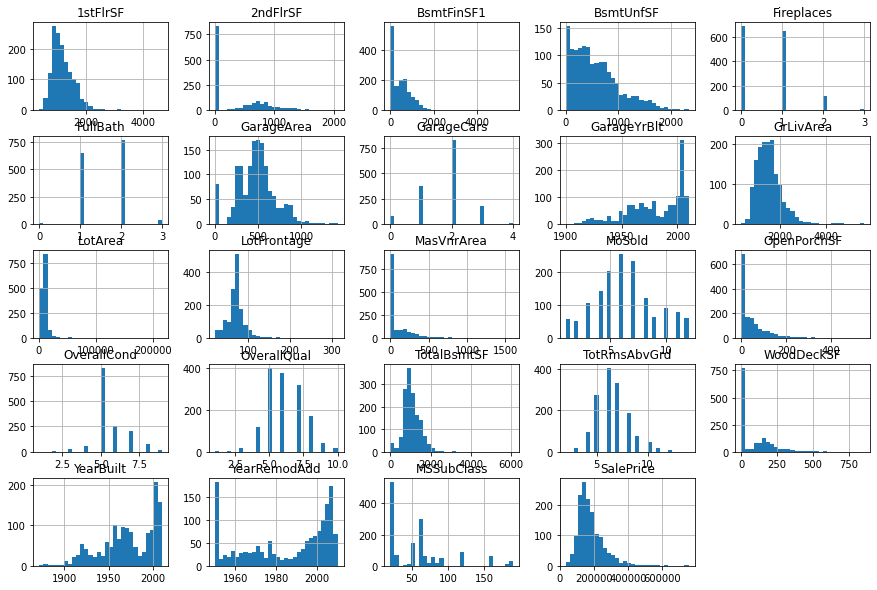

In [283]:
train[final_priority_feature].hist(bins=30, figsize=(15, 10))

### One Hot Encoding

In [284]:
discrt = []
for i in final_priority_feature:
  if i in discrete_features:
    discrt.append(i)

In [285]:
contvar = []
for i in final_priority_feature:
  if i in continous_features:
    contvar.append(i)

In [286]:
for i in contvar:
  print(i," : ",X_new[i].skew())

1stFlrSF  :  1.3767566220336365
2ndFlrSF  :  0.8130298163023265
BsmtFinSF1  :  1.685503071910789
BsmtUnfSF  :  0.9202684528039037
Fireplaces  :  0.6495651830548841
FullBath  :  0.036561558402727165
GarageArea  :  0.17998090674623907
GarageCars  :  -0.3425489297486655
GarageYrBlt  :  -0.7192915121371104
GrLivArea  :  1.3665603560164552
LotArea  :  12.207687851233496
LotFrontage  :  2.3849501679427925
MasVnrArea  :  2.6933776875772977
MoSold  :  0.21205298505146022
OpenPorchSF  :  2.3643417403694404
TotalBsmtSF  :  1.5242545490627664
TotRmsAbvGrd  :  0.6763408364355531
WoodDeckSF  :  1.5413757571931312
YearBuilt  :  -0.613461172488183
YearRemodAdd  :  -0.5035620027004709


In [287]:
### One Hot Encoding
X_new = pd.get_dummies(data=X_new, columns=discrt,drop_first=True)

test_X =  pd.get_dummies(data=test_X, columns=discrt,drop_first=True)

In [288]:
X_new.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,856,854,706,150,0,2,548,2,2003.0,1710,...,1,0,0,0,0,0,0,0,0,0
1,1262,0,978,284,1,2,460,2,1976.0,1262,...,0,0,0,0,0,0,0,0,0,0
2,920,866,486,434,1,2,608,2,2001.0,1786,...,1,0,0,0,0,0,0,0,0,0
3,961,756,216,540,1,1,642,3,1998.0,1717,...,0,1,0,0,0,0,0,0,0,0
4,1145,1053,655,490,1,2,836,3,2000.0,2198,...,1,0,0,0,0,0,0,0,0,0


In [289]:
test_X.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,896,0,468.0,270.0,0,1,730.0,1.0,1961.0,896,...,0,0,0,0,0,0,0,0,0,0
1,1329,0,923.0,406.0,0,1,312.0,1.0,1958.0,1329,...,0,0,0,0,0,0,0,0,0,0
2,928,701,791.0,137.0,1,2,482.0,2.0,1997.0,1629,...,0,0,0,0,0,0,0,0,0,0
3,926,678,602.0,324.0,1,2,470.0,2.0,1998.0,1604,...,0,0,0,0,0,0,0,0,0,0
4,1280,0,263.0,1017.0,0,2,506.0,2.0,1992.0,1280,...,0,0,0,0,0,1,0,0,0,0


In [290]:
missing = []
for i in X_new.columns:
  if i in test_X.columns:
    continue
  else:
    missing.append(i)

In [291]:
missing

['Exterior2nd_Other']

In [292]:
missing_t = []
for i in test_X.columns:
  if i in X_new.columns:
    continue
  else:
    missing_t.append(i)

In [293]:
missing_t

['MSSubClass_150']

In [294]:
test_X['Exterior2nd_Other'] = 0
col_miss = test_X.pop('MSSubClass_150')
test_X['MSSubClass_150'] = col_miss
X_new['MSSubClass_150'] = 0

In [295]:
print(X_new.shape)
print(test_X.shape)


X_new.columns

(1460, 120)
(1459, 120)


Index(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces',
       'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea',
       ...
       'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_150'],
      dtype='object', length=120)

In [296]:
test_X.columns = X_new.columns

In [297]:
test_X.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_150
0,896,0,468.0,270.0,0,1,730.0,1.0,1961.0,896,...,0,0,0,0,0,0,0,0,0,0
1,1329,0,923.0,406.0,0,1,312.0,1.0,1958.0,1329,...,0,0,0,0,0,0,0,0,0,0
2,928,701,791.0,137.0,1,2,482.0,2.0,1997.0,1629,...,0,0,0,0,0,0,0,0,0,0
3,926,678,602.0,324.0,1,2,470.0,2.0,1998.0,1604,...,0,0,0,0,0,0,0,0,0,0
4,1280,0,263.0,1017.0,0,2,506.0,2.0,1992.0,1280,...,0,0,0,0,1,0,0,0,0,0


1.8828757597682129


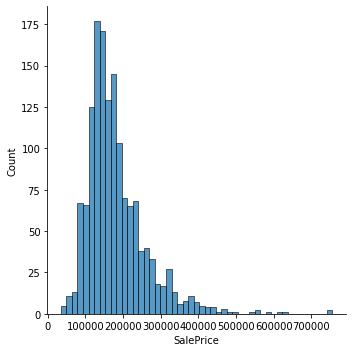

In [298]:
sns.displot(y_new)
print(y_new.skew())

0.12133506220520406


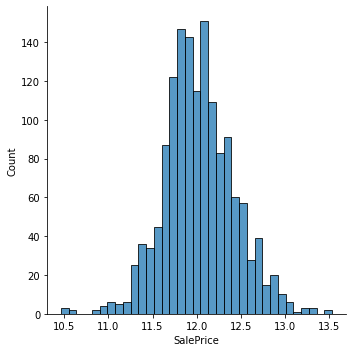

In [299]:
sns.displot(np.log(y_new))
print(np.log(y_new).skew())

In [300]:
y_new = np.log(y_new)

In [301]:
X_new[['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea',
 'OpenPorchSF', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF']] = X_new[['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea',
 'OpenPorchSF', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF']].apply(np.sqrt)

In [302]:
test_X[['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea',
 'OpenPorchSF', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF']] = test_X[['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'Fireplaces', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea',
 'OpenPorchSF', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF']].apply(np.sqrt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46cf701a10>,
      dtype=object)

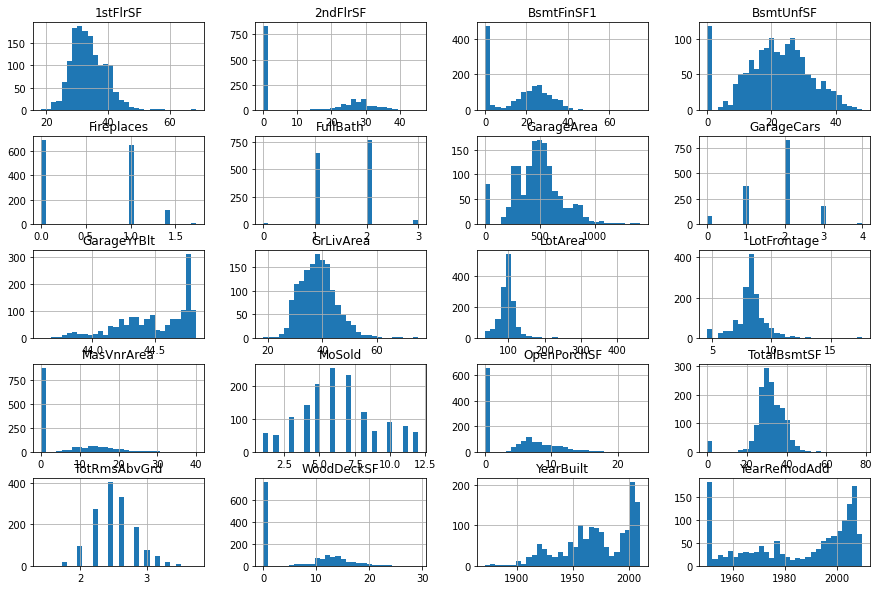

In [303]:
X_new[contvar].hist(bins=30, figsize=(15, 10))

In [306]:
for i in contvar:
  print(i," : ",X_new[i].skew())

1stFlrSF  :  0.6242627120029303
2ndFlrSF  :  0.42233238629172287
BsmtFinSF1  :  -0.02994605300118736
BsmtUnfSF  :  -0.24650610641958765
Fireplaces  :  0.04515734715816705
FullBath  :  0.036561558402727165
GarageArea  :  0.17998090674623907
GarageCars  :  -0.3425489297486655
GarageYrBlt  :  -0.7299074107615079
GrLivArea  :  0.5942546260858922
LotArea  :  4.139713548289236
LotFrontage  :  0.3682118790628435
MasVnrArea  :  1.0597062068598129
MoSold  :  0.21205298505146022
OpenPorchSF  :  0.6008842348750356
TotalBsmtSF  :  -1.2745373951324759
TotRmsAbvGrd  :  0.2526124861204096
WoodDeckSF  :  0.4865737490926002
YearBuilt  :  -0.613461172488183
YearRemodAdd  :  -0.5035620027004709


In [304]:
# train test split
from sklearn.model_selection import train_test_split
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [305]:
list(Xn_train.columns).index('MSSubClass_190')

118

In [308]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
Xn_train[contvar] = sc_X.fit_transform(Xn_train[contvar])
Xn_test[contvar] = sc_X.transform(Xn_test[contvar])
test_X[contvar] = sc_X.transform(test_X[contvar])

yn_train = yn_train.values.reshape(-1, 1)
yn_test = yn_test.values.reshape(-1, 1)

yn_train = sc_y.fit_transform(yn_train)
yn_test = sc_y.transform(yn_test)




# sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

### **Linear Regression**

In [309]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xn_train, yn_train)

LinearRegression()

In [310]:
yn_pred = regressor.predict(Xn_test)

In [311]:
## MSE & RMSE
from sklearn.metrics import mean_squared_error
lr_mse= mean_squared_error(yn_test,yn_pred)
lr_rmse=np.sqrt(lr_mse)
print(lr_rmse)

0.4242559445442263


In [312]:
## R2 value
r2_lr_test=regressor.score(Xn_test,yn_test)
r2_lr_train=regressor.score(Xn_train,yn_train)
print(r2_lr_test,r2_lr_train)


0.8080429148685387 0.920668571879886


In [313]:
yn_train.shape

(1168, 1)

In [314]:
yn_train.ravel().shape

(1168,)

### **SVR**

In [315]:
# SVR
from sklearn.svm import SVR
yn_train_svr = yn_train.ravel()
yn_test_svr = yn_test.ravel()
regressor_svr = SVR()

In [316]:
# #=========================================================================
# # exhaustively search for the optimal hyperparameters
# #=========================================================================
from sklearn.model_selection import GridSearchCV
# # set up our search grid
param_grid = {"kernel": ['poly', 'rbf', 'sigmoid'],
               "degree": [1,2,3],
               "gamma": ['scale','auto'],
               "C": [0.1,0.5,1,3,5,7,10]
              }

# # try out every combination of the above values
search = GridSearchCV(regressor_svr, param_grid, cv=5,scoring='r2').fit(Xn_train, yn_train_svr)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'C': 5, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [317]:
regressor_svr = SVR(C= 5, degree= 1, gamma= 'auto', kernel= 'rbf')
regressor_svr.fit(Xn_train, yn_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=5, degree=1, gamma='auto')

In [318]:
yn_pred_svr = regressor_svr.predict(Xn_test)

In [319]:
#mse
svr_mse= mean_squared_error(yn_test_svr,yn_pred_svr)
svr_rmse=np.sqrt(svr_mse)
print(svr_rmse)

0.3199405619576587


In [320]:
## R2 value
r2_svr_test=regressor_svr.score(Xn_test,yn_test_svr)
r2_svr_train=regressor_svr.score(Xn_train,yn_train_svr)
print(r2_svr_test,r2_svr_train)

0.8908341298974221 0.9481846174781245


## Ridge

In [321]:
from sklearn.linear_model import Ridge
r = Ridge()  # using default parameter of Ridge, here alpha = 1

In [235]:
# #=========================================================================
# # exhaustively search for the optimal hyperparameters
# #=========================================================================
from sklearn.model_selection import GridSearchCV
# # set up our search grid
param_grid = {"alpha": [0.001, 0.01, 0.1, 1, 3,5,10,100],
               "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
               }

# # try out every combination of the above values
search = GridSearchCV(r, param_grid, cv=5,scoring='r2').fit(Xn_train, yn_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'alpha': 5, 'solver': 'lsqr'}


In [322]:
r = Ridge(alpha = 5, solver = 'lsqr')
r.fit(Xn_train, yn_train)

yn_pred_r = r.predict(Xn_test)

In [323]:
#mse
ridge_mse= mean_squared_error(yn_test,yn_pred_r)
ridge_rmse=np.sqrt(ridge_mse)
print(ridge_rmse)

0.4209903662854453


In [324]:
## R2 value
r2_ridge_test=r.score(Xn_test,yn_test)
r2_ridge_train=r.score(Xn_train,yn_train)
print(r2_ridge_test,r2_ridge_train)

0.8109866020316268 0.9169422615882455


### **XG Boost**

In [325]:
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.model_selection import KFold

In [ ]:
regressor_xgb=xgb.XGBRegressor(verbosity = 0, silent=True)

# #=========================================================================
# # exhaustively search for the optimal hyperparameters
# #=========================================================================
from sklearn.model_selection import GridSearchCV
# # set up our search grid
param_grid = {"max_depth":    [4, 5,8,10],
               "n_estimators": [800, 1000,1200,1400],
               "learning_rate": [0.01, 0.015,.1,.2],
              }

# # try out every combination of the above values
search = GridSearchCV(regressor_xgb, param_grid, cv=5,scoring='r2').fit(Xn_train, yn_train)

print("The best hyperparameters are ",search.best_params_)

In [326]:
regressor_xgb= xgb.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

#n_estimators=2500, learning_rate=0.01, gamma=0, subsample=0.9,
#                           colsample_bytree=1, max_depth=5,num_parallel_tree=1,seed=10

regressor_xgb.fit(Xn_train, yn_train)

[09:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, min_child_weight=0,
             n_estimators=3460, nthread=-1, reg_alpha=6e-05, seed=27,
             subsample=0.7)

In [327]:
yn_pred_xgb = regressor_xgb.predict(Xn_test)

In [328]:
#mse
xgb_mse= mean_squared_error(yn_test,yn_pred_xgb)
xgb_rmse=np.sqrt(xgb_mse)
print(xgb_rmse)

0.33260091513624995


In [329]:
## R2 value
r2_xgb_test=regressor_xgb.score(Xn_test,yn_test)
r2_xgb_train=regressor_xgb.score(Xn_train,yn_train)
print(r2_xgb_test,r2_xgb_train)

0.8820235961936722 0.9840597640205165


## CatBoost

In [248]:
!pip install catboost
from catboost import CatBoostRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [249]:
cat_features = list(range(20,119))

In [ ]:
cb_reg = CatBoostRegressor(random_seed=13, verbose=200, iterations=1000, eval_metric='R2', loss_function='RMSE')
cb_reg.fit(Xn_train, yn_train, cat_features=cat_features, plot=True, eval_set=(Xn_test, yn_test))

In [250]:
cb_learn_rate = 0.006
n_iterations = 6000
early_stop_rounds = 400

opt_catboost_params = {'iterations' : n_iterations,
                       'learning_rate' : cb_learn_rate,
                        'loss_function':'RMSE',
                       'depth': 8,
                       'bootstrap_type' : 'Bernoulli',
                       'random_strength': 1,
                       'min_data_in_leaf': 10,
                       'l2_leaf_reg': 0.8,
                       'eval_metric' : 'R2',
                       'grow_policy' : 'Depthwise',
                       'max_bin' : 1024, 
                       'model_size_reg' : 0,
                       'task_type' : 'CPU',
                       'od_type' : 'IncToDec',
                       'metric_period' : 500,
                       'verbose' : 500,
                       'subsample' : 0.8,
                       'od_pval' : 1e-10,
                       'has_time': False,
                       'random_seed' : 13,
                       'early_stopping_rounds' : 30}

# early_stopping_rounds=30,l2_leaf_reg=0.8/3,iterations=500,depth=8,'od_wait' : 100,

cb_reg = CatBoostRegressor(**opt_catboost_params)

cb_reg.fit(Xn_train, yn_train, cat_features=cat_features, plot=True, eval_set=(Xn_test, yn_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0088524	test: 0.0085210	best: 0.0085210 (0)	total: 90.3ms	remaining: 9m 1s
500:	learn: 0.9323415	test: 0.8655475	best: 0.8655475 (500)	total: 38.5s	remaining: 7m 2s
1000:	learn: 0.9695785	test: 0.8808137	best: 0.8808156 (999)	total: 52s	remaining: 4m 19s
1500:	learn: 0.9820110	test: 0.8846208	best: 0.8846208 (1500)	total: 1m	remaining: 3m 2s
2000:	learn: 0.9898846	test: 0.8861982	best: 0.8862392 (1945)	total: 1m 10s	remaining: 2m 20s
2500:	learn: 0.9942538	test: 0.8862127	best: 0.8862525 (2086)	total: 1m 20s	remaining: 1m 52s
3000:	learn: 0.9966620	test: 0.8864914	best: 0.8865166 (2954)	total: 1m 30s	remaining: 1m 30s
3500:	learn: 0.9979944	test: 0.8864473	best: 0.8865213 (3150)	total: 1m 40s	remaining: 1m 11s
4000:	learn: 0.9987784	test: 0.8865101	best: 0.8865516 (3809)	total: 1m 50s	remaining: 55.4s
4500:	learn: 0.9992350	test: 0.8865214	best: 0.8865778 (4284)	total: 2m 1s	remaining: 40.4s
5000:	learn: 0.9995049	test: 0.8865492	best: 0.8865778 (4284)	total: 2m 14s	remaini

In [251]:
yn_pred_cbr = cb_reg.predict(Xn_test)

In [252]:
#mse
cbr_mse= mean_squared_error(yn_test,yn_pred_cbr)
cbr_rmse=np.sqrt(cbr_mse)
print(cbr_rmse)

0.32611816630908014


In [253]:
# r2 - score
from sklearn.metrics import r2_score
r2_score(yn_test,yn_pred_cbr)

0.8865777502050761

In [254]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
yn_train_rf = yn_train.ravel()
yn_test_rf = yn_test.ravel()

In [255]:
Xn_train.isnull().sum().sum()

0

In [ ]:
# #=========================================================================
# # exhaustively search for the optimal hyperparameters
# #=========================================================================
from sklearn.model_selection import GridSearchCV, KFold

# # set up our search grid
param_grid = {   
                'bootstrap': [True, False],
                'max_features': ['sqrt'],
                'min_samples_leaf': [1,2],
                'min_samples_split': [2,3],
                'n_estimators': [100,300,500,700]
              }

## try out every combination of the above values
search = GridSearchCV(regressor_rf, param_grid, cv=3,scoring='r2').fit(Xn_train, yn_train_rf)

print("The best hyperparameters are ",search.best_params_)

In [256]:
Xn_train.shape
yn_train_rf.shape

(1168,)

In [257]:
regressor_rf = RandomForestRegressor( bootstrap = False, max_features = 'sqrt', 
                                     min_samples_leaf = 1, min_samples_split = 3, n_estimators = 100,
                                     random_state = 42)
regressor_rf.fit(Xn_train, yn_train_rf)



RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_split=3,
                      random_state=42)

In [258]:
yn_pred_xgb = regressor_rf.predict(Xn_test)

In [259]:
print('R^2 Training Score: {:.2f} \nR^2 test Score: {:.2f}'.format(regressor_rf.score(Xn_train, yn_train_rf), 
                                                                                  regressor_rf.score(Xn_test, yn_test_rf)))

R^2 Training Score: 1.00 
R^2 test Score: 0.87


In [260]:
#mse
rf_mse= mean_squared_error(yn_test,yn_pred_xgb)
rf_rmse=np.sqrt(rf_mse)
print(rf_rmse)

0.34827777324786563


In [261]:
## R2 value
r2_rf_test=regressor_rf.score(Xn_test, yn_test_rf)
r2_rf_train=regressor_rf.score(Xn_train, yn_train_rf)
print(r2_rf_test,r2_rf_train)

0.8706400639340957 0.9987793171642871


## Light GBM

In [337]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [339]:
from lightgbm import LGBMRegressor
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [340]:
lightgbm.fit(Xn_train, yn_train_rf)

LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              feature_fraction=0.2, feature_fraction_seed=7, learning_rate=0.01,
              max_bin=200, n_estimators=5000, num_leaves=4,
              objective='regression', verbose=-1)

In [341]:
yn_pred_lgbm = lightgbm.predict(Xn_test)

In [342]:
#mse
lgbm_mse= mean_squared_error(yn_test,yn_pred_lgbm)
lgbm_rmse=np.sqrt(lgbm_mse)
print(lgbm_rmse)

0.3599086961585027


In [343]:
## R2 value
r2_lgbm_test=lightgbm.score(Xn_test, yn_test_rf)
r2_lgbm_train=lightgbm.score(Xn_train, yn_train_rf)
print(r2_lgbm_test,r2_lgbm_train)

0.8618557049350235 0.9495333154058411


*SUBMISSION 1: FINAL PREDICTION *

In [269]:
yn_pred_test_xgb = regressor_xgb.predict(test_X)
yn_pred_test_xgb = yn_pred_test_xgb.reshape(-1, 1)
y_final_xgb = sc_y.inverse_transform(yn_pred_test_xgb)




In [270]:
y_final_1 = pd.DataFrame(y_final_xgb)
y_final_1.head()

,0
0,12.331178
1,12.031521
2,12.256086
3,12.312029
4,12.220812


In [271]:
y_final_1.to_csv('sample_submission1.csv')

SUBMISSION 2: FINAL PREDICTION

In [330]:
test_X.head()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtUnfSF,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_150
0,-0.700145,-0.857703,0.401380,-0.489012,-1.035321,-1.037179,1.224572,-1.057111,-0.737845,-1.334295,...,0,0,0,0,0,0,0,0,0,0
1,0.526656,-0.857703,1.068621,-0.128956,-1.035321,-1.037179,-0.772060,-1.057111,-0.858503,-0.312117,...,0,0,0,0,0,0,0,0,0,0
2,-0.600486,1.002844,0.896525,-0.946806,0.804399,0.792769,0.039967,0.313261,0.702919,0.299952,...,0,0,0,0,0,0,0,0,0,0
3,-0.606663,0.972067,0.622765,-0.337124,0.804399,0.792769,-0.017352,0.313261,0.742754,0.251227,...,0,0,0,0,0,0,0,0,0,0
4,0.399058,-0.857703,-0.011738,1.008126,-1.035321,0.792769,0.154607,0.313261,0.503594,-0.418432,...,0,0,0,0,1,0,0,0,0,0


In [331]:
test_X.to_csv('test_test.csv')

In [332]:
yn_pred_test_svr = regressor_svr.predict(test_X)


yn_pred_test_svr = yn_pred_test_svr.reshape(-1, 1)
y_final_svr = sc_y.inverse_transform(yn_pred_test_svr)

In [333]:
y_final_svr = np.exp(y_final_svr)

In [334]:
y_final_2 = pd.DataFrame(y_final_svr)
y_final_2.head()

,0
0,129200.411544
1,152734.987812
2,199550.181057
3,198387.297490
4,147445.920918


In [336]:
y_final_2.to_csv('sample_submission23.csv')

### Reduce Overfitting by reducing number of feature
### Use Label Encoding for XGB
### Use standarization for both Train and Test by fit transform method

In [ ]:
X_new2 = train[final_priority_feature].copy()
y_new2=np.log(X_new2.pop('SalePrice'))
test2_X = test[X_new2.columns].copy()

In [ ]:
discrt = []
for i in final_priority_feature:
  if i in discrete_features:
    discrt.append(i)


In [ ]:
### One Hot Encoding
X_new2 = pd.get_dummies(data=X_new2, columns=discrt,drop_first=True)

test2_X =  pd.get_dummies(data=test2_X, columns=discrt,drop_first=True)

In [ ]:
missing = []
for i in X_new2.columns:
  if i in test2_X.columns:
    continue
  else:
    missing.append(i)

missing_t = []
for i in test2_X.columns:
  if i in X_new2.columns:
    continue
  else:
    missing_t.append(i)

In [ ]:
test2_X['Exterior2nd_Other'] = 0
col_miss = test2_X.pop('MSSubClass_150')
test2_X['MSSubClass_150'] = col_miss
X_new2['MSSubClass_150'] = 0

test2_X.columns = X_new2.columns

In [ ]:
# P-Value check

import statsmodels.api as sm
def fit_LR(X_train,y_train):
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [ ]:
fit_LR(X_new2,y_new2)

In [ ]:
X_new2.drop(['BsmtFinSF1', 'OpenPorchSF', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_NPkVill',
'OverallCond_2','OverallCond_4' ,'OverallCond_5', 'OverallCond_6', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
'OverallQual_5', 'OverallQual_6', 'Exterior2nd_Brk Cmn', 'Exterior2nd_HdBoard', 'Exterior2nd_Other', 'Exterior2nd_Wd Shng',
'Foundation_Slab'], axis = 1, inplace = True)

In [ ]:
fit_LR(X_new2,y_new2)

In [ ]:
X_new2.drop(['GarageArea','TotRmsAbvGrd','Neighborhood_Blueste','Exterior2nd_AsphShn','Exterior2nd_CBlock','Exterior2nd_CmentBd',
'FireplaceQu_No Fireplace','Foundation_CBlock','Foundation_Stone','GarageFinish_RFn','MSSubClass_40','MSSubClass_45'],axis = 1,inplace = True)

In [ ]:
fit_LR(X_new2,y_new2)

In [ ]:
X_new2.drop(['1stFlrSF','2ndFlrSF','GarageYrBlt','GrLivArea','MoSold','YearRemodAdd','GarageType_CarPort','Neighborhood_CollgCr',
'Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_Timber','Neighborhood_Veenker','Exterior2nd_MetalSd','Exterior2nd_Plywood',
'Exterior2nd_Stone','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','ExterQual_Fa','ExterQual_Gd','ExterQual_TA','FireplaceQu_Fa',
'FireplaceQu_Gd','FireplaceQu_Po','FireplaceQu_TA','Foundation_PConc','Foundation_Wood','GarageFinish_Unf','MSSubClass_30',
'MSSubClass_75','MSSubClass_80','MSSubClass_85'],axis = 1, inplace = True)

In [ ]:
fit_LR(X_new2,y_new2)

In [ ]:
X_new2.drop(['LotFrontage','YearBuilt','Neighborhood_BrkSide','Neighborhood_MeadowV','Neighborhood_SWISU','MSSubClass_90',
'MSSubClass_180','MSSubClass_190'], axis = 1,inplace = True,)

In [ ]:
fit_LR(X_new2,y_new2)

In [ ]:
X_new2.columns

In [ ]:
contvar = []
for i in X_new2.columns:
  if i in continous_features:
    contvar.append(i)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
Xn2_train, Xn2_test, yn2_train, yn2_test = train_test_split(X_new2, y_new2, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
Xn2_train[contvar] = sc_X.fit_transform(Xn2_train[contvar])
Xn2_test[contvar] = sc_X.transform(Xn2_test[contvar])
test2_X[contvar] = sc_X.transform(test2_X[contvar])

yn2_train = yn2_train.values.reshape(-1, 1)
yn2_test = yn2_test.values.reshape(-1, 1)

yn2_train = sc_y.fit_transform(yn2_train)
yn2_test = sc_y.transform(yn2_test)

In [ ]:
test2_Xn = test2_X[X_new2.columns]

In [ ]:
print(Xn2_train.shape)
print(test2_Xn.shape)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from sklearn.model_selection import KFold

regressor_xgb= xgb.XGBRegressor(n_estimators=2500, learning_rate=0.01, gamma=0, subsample=0.9,
                           colsample_bytree=1, max_depth=5,num_parallel_tree=1,seed=10)

regressor_xgb.fit(Xn2_train, yn2_train)

yn2_pred_xgb = regressor_xgb.predict(Xn2_test)


In [ ]:
#mse
xgb_mse= mean_squared_error(yn2_test,yn2_pred_xgb)
xgb_rmse=np.sqrt(xgb_mse)
print(xgb_rmse)

## R2 value
r2_xgb_test=regressor_xgb.score(Xn2_test,yn2_test)
r2_xgb_train=regressor_xgb.score(Xn2_train, yn2_train)
print(r2_xgb_test,r2_xgb_train)

In [ ]:
# X_new2, y_new2, test2_X

fit_LR(X_new2,y_new2)